<a href="https://colab.research.google.com/github/wilton-jose/MVP-Machine-Learning/blob/main/MVP_PUCRIO_Wilton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Machine Learning e Analytics
Profs.:

Curso: Pós Graduação em Análise de Dados e Analytics - PUC-RJ

Aluno: Wilton José da Silva Júnior

O conjuto de dados utilizados neste projeto é o *Electrical Fault detection and classification*, com dataset diponibilizado em https://www.kaggle.com/datasets/esathyaprakash/electrical-fault-detection-and-classification/data.

O conjunto em questão é composto por 12 atributo e 7861 linhas de informações de medidas de um sistema de energia simulado. Ele inclui dados de tensões de linha e correntes de linha em várias condições operacionais e de falha. As principais características e suas descrições são as seguintes:

* Corrente na Linha A (Ia)
* Corrente na Linha B (Ib)
* Corrente na Linha C (Ic)
* Tensão na Linha A (Va)
* Tensão na Linha B (Vb)
* Tensão na Linha C (Vc)

O conjunto de dados também inclui rótulos indicando diferentes tipos de falhas em formato binário, correspondendo a condições de falha na linha de transmissão, conforme quadro abaixo:



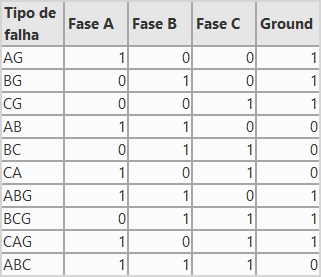




#1 - Importação de bibliotecas



In [11]:
#Importação
import pandas as pd
import numpy as np
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [12]:
import warnings
warnings.filterwarnings('ignore')

# 2 - Carga do *dataset*

In [13]:
# Carga arquivo csv usando Pandas
url = 'https://raw.githubusercontent.com/wilton-jose/MVP-Machine-Learning/refs/heads/main/classData.csv'
df = pd.read_csv(url, delimiter=';')

# visualizando as 5 primeiras linhas do dataset para validar a carga
df.head()

,Ia,Ib,Ic,Va,Vb,Vc,G,C,B,A
0,"-151,2918124","-9,677451563","85,80016226","0,400749853","-0,132934945","-0,267814907",1,0,0,1
1,"-336,1861826","-76,28326195","18,32889658","0,312731934","-0,123633156","-0,189098779",1,0,0,1
2,"-502,891583","-174,6480233","-80,92466346","0,265728444","-0,114300749","-0,151427695",1,0,0,1
3,"-593,9419049","-217,7033594","-124,8919239","0,235510535","-0,104940254","-0,130570281",1,0,0,1
4,"-643,6636173","-224,1594274","-132,2828154","0,20953688","-0,095553751","-0,113983129",1,0,0,1


In [14]:
# visualizando as 5 últimas linhas do dataset
df.tail()

,Ia,Ib,Ic,Va,Vb,Vc,G,C,B,A
7856,"-66,2379206","38,45704096","24,91223947","0,094421006","-0,552018756","0,45759775",0,0,0,0
7857,"-65,84949333","37,46545409","25,51567475","0,10377809","-0,555185531","0,451407441",0,0,0,0
7858,"-65,44669763","36,4720551","26,10655368","0,11310658","-0,558210927","0,445104348",0,0,0,0
7859,"-65,02963273","35,47708841","26,68473109","0,122404174","-0,561094199","0,438690025",0,0,0,0
7860,"-64,59840133","34,48079878","27,25006492","0,131668579","-0,563834635","0,432166056",0,0,0,0


# 3 - Preparandos os dados

## 3.1 Verificando valores duplicados e missing


In [15]:
# Buscando por valores missing
print("\nBuscando por valores missing:")
ValoresMissing = df.isnull().sum()

# Buscando valores dulicados
LinhasDuplicadas = df.duplicated().sum()

print(ValoresMissing)

print("\nNumero de linhas duplicadas: ", LinhasDuplicadas)


Buscando por valores missing:
Ia    0
Ib    0
Ic    0
Va    0
Vb    0
Vc    0
G     0
C     0
B     0
A     0
dtype: int64

Numero de linhas duplicadas:  0


Não há valores missing, também, não há valores linhas duplicados no dataset selecionado.

## 3.2 Convertendo valores de saída
Converteremos os valores de saída G, C, B e A, em valores de texto que representa e identifica o tipo de falta, conforme dados abaixo:

    '0000': 'Sem Falta',
    '1000': 'Falta Linha para terra A',
    '0100': 'Falta linha para terra B',
    '0010': 'Falta linha para terra C',
    '0011': 'Falta Linha-Linha BC',
    '0101': 'Falta Linha-Linha AC',
    '1001': 'Falta Linha-Linha AB',
    '1010': 'Falta Linha-Linha-Terra AB',
    '0101': 'Falta Linha-Linha-Terra AC',
    '0110': 'Falta Linha-Linha-Terra BC',
    '0111': 'Falta Trifásica',
    '1111': 'Falta Trifásica-Terra',
    '1011': 'Falta Linha A Linha B para terra'

Nesta etapa selecinamos e concatenamos os valores dos atributos G, C, B e A, convertendo em string, e atribuindo o resultado a uma nova coluna Tipo_Falta.

In [16]:
#Combinando as conlunas G, C, B a A e atribuinda a nova coluna Tipo_Falta
df['Tipo_Falta'] = df[['G', 'C', 'B', 'A']].astype(str).agg(''.join, axis=1)

#Visualizando o dataframe df
df.head()

,Ia,Ib,Ic,Va,Vb,Vc,G,C,B,A,Tipo_Falta
0,"-151,2918124","-9,677451563","85,80016226","0,400749853","-0,132934945","-0,267814907",1,0,0,1,1001
1,"-336,1861826","-76,28326195","18,32889658","0,312731934","-0,123633156","-0,189098779",1,0,0,1,1001
2,"-502,891583","-174,6480233","-80,92466346","0,265728444","-0,114300749","-0,151427695",1,0,0,1,1001
3,"-593,9419049","-217,7033594","-124,8919239","0,235510535","-0,104940254","-0,130570281",1,0,0,1,1001
4,"-643,6636173","-224,1594274","-132,2828154","0,20953688","-0,095553751","-0,113983129",1,0,0,1,1001


In [17]:
#Dicionário: Definindo o tipo de falta
DicionarioTipoFalta = {
    '0000': 'Sem Falta',
    '0001': 'Falta para terra A',
    '0010': 'Falta para terra B',
    '0100': 'Falta para terra C',
    '0011': 'Falta Linha-Linha AB',
    '0101': 'Falta Linha-Linha AC',
    '1001': 'Falta Linha-Terra AG',
    '1010': 'Falta Linha-Terra BG',
    '0101': 'Falta Linha-Linha AC',
    '0110': 'Falta Linha-Linha BC',
    '0111': 'Falta Trifásica',
    '1111': 'Falta Trifásica-Terra',
    '1011': 'Falta Linha-Linha-Terra ABG'
}

#Convertendo os valores da coluna Tipo_Falta, nos valores do dicionário TipoFalta
df['Tipo_Falta'] = df['Tipo_Falta'].map(DicionarioTipoFalta)

#Visualizando o dataframe df
df.head()

,Ia,Ib,Ic,Va,Vb,Vc,G,C,B,A,Tipo_Falta
0,"-151,2918124","-9,677451563","85,80016226","0,400749853","-0,132934945","-0,267814907",1,0,0,1,Falta Linha-Terra AG
1,"-336,1861826","-76,28326195","18,32889658","0,312731934","-0,123633156","-0,189098779",1,0,0,1,Falta Linha-Terra AG
2,"-502,891583","-174,6480233","-80,92466346","0,265728444","-0,114300749","-0,151427695",1,0,0,1,Falta Linha-Terra AG
3,"-593,9419049","-217,7033594","-124,8919239","0,235510535","-0,104940254","-0,130570281",1,0,0,1,Falta Linha-Terra AG
4,"-643,6636173","-224,1594274","-132,2828154","0,20953688","-0,095553751","-0,113983129",1,0,0,1,Falta Linha-Terra AG


##3.3 Atribuindo Target
Nesta etapa os valores categoricos do atributo Tipo_Falta serão traduzidos em valores numéricos. Utilizaremos para esta conversão o objeto LabelEncoder, presente na biblioteca sklearn.preprocessing.

Os alogiritimos de Machine Learning trabalham melhor com dados numéricos.**negrito**

In [18]:
# Inicializando o LabelEncoder
LabelEncoder = LabelEncoder()

# Transformando o atributo Tipo_Falta em valores inteiros
df['Target'] = LabelEncoder.fit_transform(df['Tipo_Falta'])

#Visualizando a saída
print(df[['Tipo_Falta', 'Target']].value_counts().sort_index(level='Target'))

Tipo_Falta                   Target
Falta Linha-Linha BC         0         1004
Falta Linha-Linha-Terra ABG  1         1134
Falta Linha-Terra AG         2         1129
Falta Trifásica              3         1096
Falta Trifásica-Terra        4         1133
Sem Falta                    5         2365
Name: count, dtype: int64


Temos como resultado da atribução de valores inteiros a coluna Tipo_Falta a seguinte relação:

```
#Tipo_Falta                       Target
Falta Linha A Linha B para terra    0         
Falta Linha-Linha AB                1         
Falta Linha-Linha-Terra BC          2         
Falta Trifásica                     3         
Falta Trifásica-Terra               4         
Sem Falta                           5         
```



# 4 - Analise do dataset

## 4.1 Estatistica descritiva

In [19]:
#Verificando a quantidade de linhas e colunas
df.shape

(7861, 12)

In [20]:
#Verificando a quantidade de colunas, nome das colunas, numero de linhas,
#contagem de valores nulos em cada colunas, tipo de de dados das colunas
#Quantidade de memoria utilizada
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Ia          7861 non-null   object
 1   Ib          7861 non-null   object
 2   Ic          7861 non-null   object
 3   Va          7861 non-null   object
 4   Vb          7861 non-null   object
 5   Vc          7861 non-null   object
 6   G           7861 non-null   int64 
 7   C           7861 non-null   int64 
 8   B           7861 non-null   int64 
 9   A           7861 non-null   int64 
 10  Tipo_Falta  7861 non-null   object
 11  Target      7861 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 737.1+ KB


In [21]:
df[['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']] = df[['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']].apply(lambda x: x.str.replace(',', '.')).astype(float)

In [22]:
df.drop(['G','C', 'B', 'A', 'Tipo_Falta', 'Target'], axis=1).describe()

,Ia,Ib,Ic,Va,Vb,Vc
count,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000
mean,13.721194,-44.845268,34.392394,-0.007667,0.001152,0.006515
std,464.741671,439.269195,371.107412,0.289150,0.313437,0.307897
min,-883.542316,-900.526951,-883.357762,-0.620748,-0.608016,-0.612709
25%,-119.802518,-271.845947,-61.034219,-0.130287,-0.159507,-0.215977
50%,2.042805,5.513317,-4.326711,-0.005290,0.001620,0.009281
75%,227.246377,91.194282,49.115141,0.111627,0.153507,0.239973
max,885.738571,889.868884,901.274261,0.595342,0.627875,0.600179


As correntes Ia, Ib e Ic apresentam uma ampla faixa de valores entre seus mínimos e máximos, com desvios padrão que se distanciam significativamente de suas respectivas médias. Isso sugere a presença de outliers nos dados, o que é esperado em sistemas elétricos durante condições de falha, visto que falhas geralmente causam variações abruptas na corrente.

Em contraste, as tensões Va, Vb e Vc possuem desvios padrão próximos às suas médias, indicando uma maior densidade de pontos de dados em torno da média. Esse comportamento é típico para medidas de tensão em sistemas elétricos, pois as flutuações de tensão durante falhas são geralmente menores.





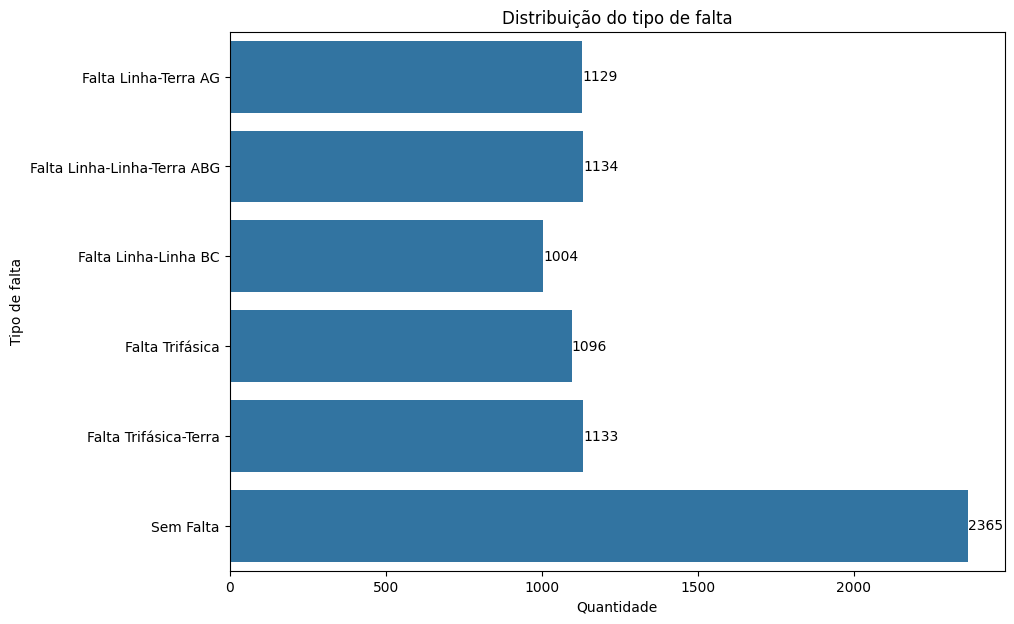

In [23]:
# Plotando a distribuição dos tipos de falta
plt.figure(figsize=(10, 7))
ax = sns.countplot(df['Tipo_Falta'])
plt.title('Distribuição do tipo de falta')
plt.xlabel('Quantidade')
plt.ylabel('Tipo de falta')

# Adicionando os rótulos de dados
for p in ax.patches:
    ax.annotate(
        format(p.get_width(), '.0f'),  # Formata o valor como inteiro
        (p.get_width() + 0.5, p.get_y() + p.get_height() / 2),  # Posição do rótulo
        ha='left',  # Alinhamento horizontal
        va='center'  # Alinhamento vertical
    )
plt.show()

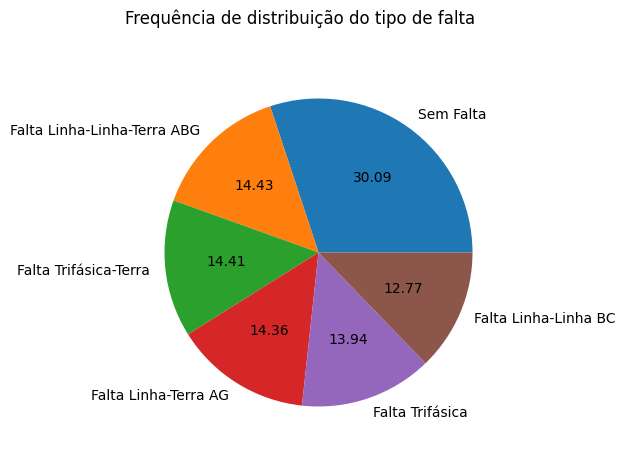

In [24]:
ax1 = plt.figure(figsize=(15,5))
ax1 = plt.gca()
ax1.pie(df['Tipo_Falta'].value_counts(),autopct='%0.2f',labels=df['Tipo_Falta'].value_counts().index)

plt.suptitle('Frequência de distribuição do tipo de falta')
plt.show()

## 4.2 Analise da correlação de Pearson

Coeficiente de Pearson é utilizado para compreender a associação entre duas ou mais variáveis. Nesse caso, a análise de correlação é uma forma descritiva que mede se há e qual o grau de dependência entre variáveis, ou seja, o quanto uma variável interfere em outra.

Este coeficiente, assume apenas valores entre -1 e 1.

A análise de correlação vai retornar três possíveis cenários:

1.   correlação positiva;
2.   correlação negativa;
3.   Não há correlação.

Como podemos interpretar os valores?

* 0,9 a 1,0 (positivo ou negativo): correlação muito forte;
* 0,7 a 0,9 (positivo ou negativo): correlação forte;
* 0,5 a 0,7 (positivo ou negativo): correlação moderada;
* 0,3 a 0,5 (positivo ou negativo): correlação fraca;
* 0,0 a 0,3 (positivo ou negativo): não possui correlação.

In [25]:
pd.DataFrame.corr(df.drop(columns=['Tipo_Falta','G','C','B','A'])).style.background_gradient(cmap='coolwarm')

,Ia,Ib,Ic,Va,Vb,Vc,Target
Ia,1.000000,-0.374241,-0.276457,0.035682,-0.274612,0.246043,-0.016005
Ib,-0.374241,1.000000,-0.528291,0.029118,0.032101,-0.060023,0.088543
Ic,-0.276457,-0.528291,1.000000,-0.069137,-0.056967,0.122919,-0.059370
Va,0.035682,0.029118,-0.069137,1.000000,-0.480247,-0.450225,-0.009827
Vb,-0.274612,0.032101,-0.056967,-0.480247,1.000000,-0.566986,0.017470
Vc,0.246043,-0.060023,0.122919,-0.450225,-0.566986,1.000000,-0.008555
Target,-0.016005,0.088543,-0.059370,-0.009827,0.017470,-0.008555,1.000000


Aqui temos a analise das correlações da matriz, conforme a escala de Pearson:

* **Ib e Ic**: O coeficiente de correlação é de -0.528291, indicando correlação negativa moderada. A correlação negativa indica que a medida que uma variavel aumenta a outra tende diminir e vice-versa;

* **Ia e Ib**: O coeficiente de correlação é de -0.374241, indicando correlação fraca entre estas duas correntes;

* **Vb e Vc**: O coeficiente de correlação é de -0.566986, indicando que existe correlação moderada negativa entre estas duas tensões;

* **Va e Vc**:  O coeficiente de correlação é de -0.450225, indicando correlação fraca entres as duas variaveis;

* **Va e Vb**: O coeficiente de correlação é de -0.480247, indicando correlação fraca entres as duas variaveis.

As demais correlações classificam-se como nulas.

## 4.3 Distribuição dos dados

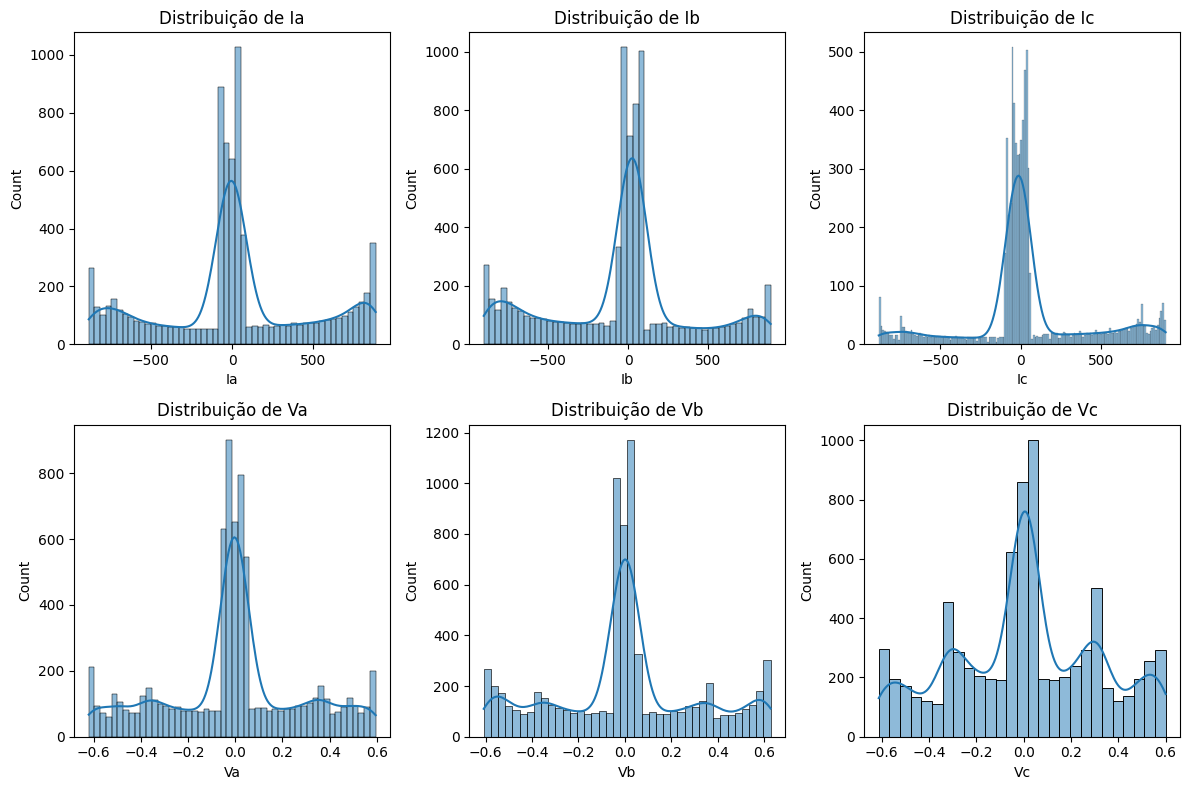

In [26]:
CorrentesTensoes = ['Ia','Ib','Ic','Va','Vb','Vc']

plt.figure(figsize=(12, 8))

for i, CorrentesTensoes in enumerate(CorrentesTensoes):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[CorrentesTensoes], kde=True)
    plt.title(f'Distribuição de {CorrentesTensoes}')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.tight_layout()
plt.show()



*   Observa-se que há uma dispersão das leituras de correntes, mas, para as tensões temos uma concentração maior entorno do zero.


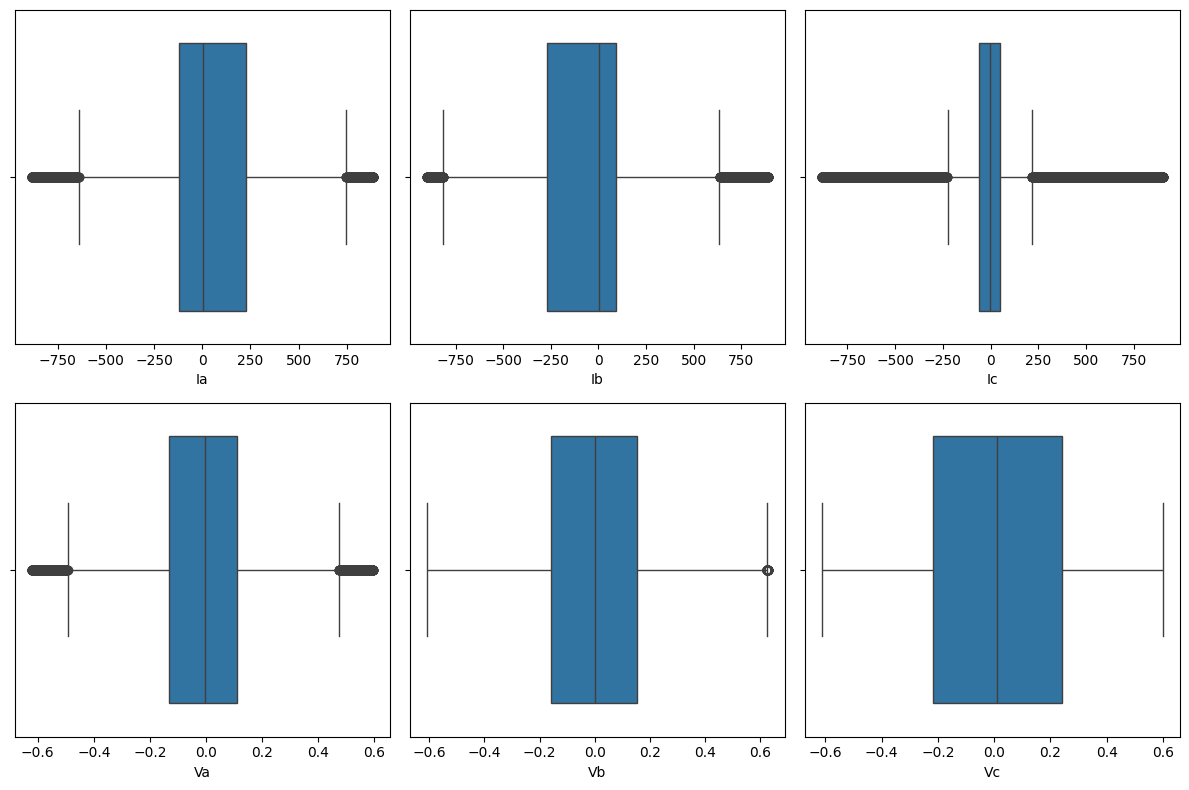

In [27]:
CorrentesTensoes = ['Ia','Ib','Ic','Va','Vb','Vc'] # Redefine CorrentesTensoes

plt.figure(figsize=(12, 8))

# Now 'col' will correctly iterate through the column names
for i, col in enumerate(CorrentesTensoes):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, x=col)  # Changed to sns.boxplot format

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.tight_layout()
plt.show()

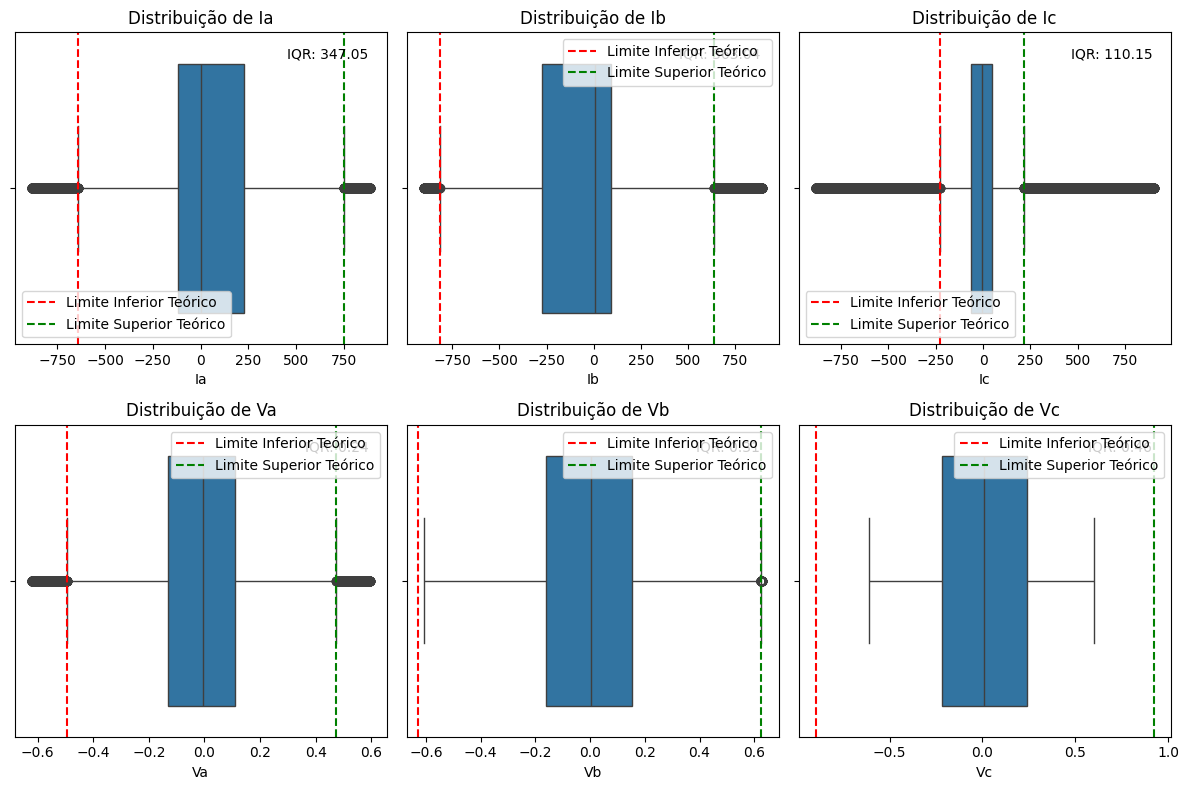

In [28]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(CorrentesTensoes):
    plt.subplot(2, 3, i+1)

    # Calculate IQR and theoretical limits
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Identify outliers
    #outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)][col]

    # Create boxplot
    sns.boxplot(x=df[col])

    # Highlight outliers with different color and marker
    #plt.scatter(outliers, [1] * len(outliers), color='red', marker='x', label='Outliers')

    # Add theoretical limits as lines
    plt.axvline(lower_limit, color='red', linestyle='--', label='Limite Inferior Teórico')
    plt.axvline(upper_limit, color='green', linestyle='--', label='Limite Superior Teórico')

    # Add IQR as text annotation
    plt.text(0.95, 0.95, f"IQR: {IQR:.2f}", transform=plt.gca().transAxes, ha='right', va='top')

    plt.title(f'Distribuição de {col}')
    plt.legend()  # Show legend

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.tight_layout()
plt.show()

In [29]:
# Crie um dicionário para armazenar os valores do boxplot
boxplot_data = {}

for col in CorrentesTensoes:
    # Calcule os valores do boxplot usando describe()
    stats = df[col].describe()

    # Calcule IQR e limites teóricos
    IQR = stats['75%'] - stats['25%']
    lower_limit = stats['25%'] - 1.5 * IQR
    upper_limit = stats['75%'] + 1.5 * IQR

    # Identifique outliers
    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)][col]

    # Contagem de outliers
    num_outliers = len(outliers)

    # Armazene os valores no dicionário
    boxplot_data[col] = {
        'Mínimo': stats['min'],
        'Q1': stats['25%'],
        'Mediana': stats['50%'],
        'Q3': stats['75%'],
        'Máximo': stats['max'],
        'Limite Inferior Teórico': lower_limit,
        'Limite Superior Teórico': upper_limit,
        'Número de Outliers': num_outliers,

    }

# Crie um DataFrame a partir do dicionário
boxplot_df = pd.DataFrame(boxplot_data).T

# Exiba o DataFrame
boxplot_df

,Mínimo,Q1,Mediana,Q3,Máximo,Limite Inferior Teórico,Limite Superior Teórico,Número de Outliers
Ia,-883.542316,-119.802518,2.042805,227.246377,885.738571,-640.375860,747.819720,1802.0
Ib,-900.526951,-271.845947,5.513317,91.194282,889.868884,-816.406289,635.754624,1216.0
Ic,-883.357762,-61.034219,-4.326711,49.115141,901.274261,-226.258259,214.339181,2524.0
Va,-0.620748,-0.130287,-0.005290,0.111627,0.595342,-0.493157,0.474498,1160.0
Vb,-0.608016,-0.159507,0.001620,0.153507,0.627875,-0.629027,0.623027,71.0
Vc,-0.612709,-0.215977,0.009281,0.239973,0.600179,-0.899901,0.923898,0.0


# 5 - Modelagem e Avaliação

## 5.1 Separação de dados para treino e teste

In [30]:
X = df.drop(["G", "C", "B","A","Tipo_Falta","Target"], axis = 1)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 20% para teste

y_train_counts = y_train.value_counts()
y_train_percentage = y_train.value_counts(normalize=True) * 100
y_train_percentage = y_train.value_counts(normalize=True) * 100
y_train_distribution = pd.DataFrame({'Contagem': y_train_counts, 'Porcentagem': y_train_percentage})
y_train_distribution.sort_index(level='Target')


,Contagem,Porcentagem
Target,,
0,691,12.559069
1,796,14.467466
2,805,14.631043
3,756,13.740458
4,790,14.358415
5,1664,30.243548




```

Target	Contagem    Porcentagem
0	        796	  14.467466
1	        805	  14.631043
2	        691	  12.559069
3	        756	  13.740458
4	        790	  14.358415
5	       1664	  30.243548
```

Podemos observar que há um desequilibrio de distribuição entre as classes dos tipos de falhas. Então, para evitarmos enviesamento em direção à classe majoritária, aplicariamos a técnica SMOTE para balanceamento das classes minortárias.

## 5.2 Treinamento e Teste

Como mensionado anteriormente, aplicaresmos testes utilizando a técnica SMOTE que consistem em balancear os dados, criando uma representação sintética das classes minotiárias de dados.

In [ ]:
#Avaliação dos Classificadores

def AvaliacaoClassificadores(X_train, X_test, y_train, y_test, UsarSmote=False):
  num_folds = 5
  #Dicionário vazio para armazenamento dos resultados dos testes
  Resultados = {}

  if UsarSmote:
    smote = SMOTE(random_state=1)
    X_train, y_train = smote.fit_resample(X_train, y_train)

  #Dicionário dos testes
  Classificadores = [
    LogisticRegression(random_state=1),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=1),
    GaussianNB(),
    SVC(random_state=1),
  ]

  for Classificador in Classificadores:
    # Usando cross_val_score para validação cruzada
    scores_accuracy = cross_val_score(Classificador, X, y, cv=num_folds, scoring='accuracy')
    scores_precision = cross_val_score(Classificador, X, y, cv=num_folds, scoring='precision_weighted')
    scores_recall = cross_val_score(Classificador, X, y, cv=num_folds, scoring='recall_weighted')
    scores_f1 = cross_val_score(Classificador, X, y, cv=num_folds, scoring='f1_weighted')

    Resultados[Classificador.__class__.__name__] = {
        'Accuracy Média': scores_accuracy.mean(),
        'Desvio Padrão Accuracy': scores_accuracy.std(),
        'Precision Média': scores_precision.mean(),
        'Desvio Padrão Precision': scores_precision.std(),
        'Recall Médio': scores_recall.mean(),
        'Desvio Padrão Recall': scores_recall.std(),
        'F1-Score Médio': scores_f1.mean(),
        'Desvio Padrão F1-Score': scores_f1.std(),
    }
  return Resultados

def PlotarResultados(resultados, metrica):
    """Plota um gráfico de barras comparando os resultados dos modelos."""

    classificadores = list(resultados.keys())
    valores = [resultados[classificador][metrica] for classificador in classificadores]

    #plt.figure(figsize=(10, 6))
    # Capture the bar plot objects in the 'bars' variable
    #bars = plt.bar(classificadores, valores, color=['blue', 'green', 'red', 'purple', 'orange'])
    #plt.title(f'Comparação de {metrica.split(" ")[0]} dos Modelos')  # Título mais conciso
    #plt.xlabel('Classificador')
    #plt.ylabel(metrica)
    #plt.xticks(rotation=45, ha='right')  # Rotação dos rótulos do eixo x
    #plt.tight_layout()

    # Adicionando rótulos de dados
    #for bar in bars:
    #    yval = bar.get_height()
    #    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    #plt.show()


#Teste sem normalizar e sem SMOTE
print("\nResultados sem Normalização e sem SMOTE:")
ResultadosSemNormSemSmote = AvaliacaoClassificadores(X_train, X_test, y_train, y_test, UsarSmote=False)
for Classificador, metricas in ResultadosSemNormSemSmote.items():  # Correção: adicionado loop para exibir as métricas
    print(f"\n{Classificador}:")
    for NomeMetricas, Valor in metricas.items():
        print(f"  {NomeMetricas}: {Valor:.4f}")
    print('\n')

metricas = ['Accuracy Média', 'Precision Média', 'Recall Médio', 'F1-Score Médio']
for metrica in metricas:
    PlotarResultados(ResultadosSemNormSemSmote, metrica)
print('\n')

print("\nResultados sem Normalização e com SMOTE:")
ResultadosSemNormSemSmote = AvaliacaoClassificadores(X_train, X_test, y_train, y_test, UsarSmote=True)
for Classificador, metricas in ResultadosSemNormSemSmote.items():  # Correção: adicionado loop para exibir as métricas
    print(f"\n{Classificador}:")
    for NomeMetricas, Valor in metricas.items():
        print(f"  {NomeMetricas}: {Valor:.4f}")
    print('\n')

metricas = ['Accuracy Média', 'Precision Média', 'Recall Médio', 'F1-Score Médio']
for metrica in metricas:
    PlotarResultados(ResultadosSemNormSemSmote, metrica)
    print('\n')

#Avaliação com normalização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Teste com normalizar e sem SMOTE
print("\nResultados com Normalização e sem SMOTE:")
ResultadosSemNormSemSmote = AvaliacaoClassificadores(X_train_scaled, X_test_scaled, y_train, y_test, UsarSmote=False)
for Classificador, metricas in ResultadosSemNormSemSmote.items():  # Correção: adicionado loop para exibir as métricas
    print(f"\n{Classificador}:")
    for NomeMetricas, Valor in metricas.items():
        print(f"  {NomeMetricas}: {Valor:.4f}")
    print('\n')

metricas = ['Accuracy Média', 'Precision Média', 'Recall Médio', 'F1-Score Médio']
for metrica in metricas:
    PlotarResultados(ResultadosSemNormSemSmote, metrica)
    print('\n')

print("\nResultados com Normalização e com SMOTE:")
ResultadosSemNormSemSmote = AvaliacaoClassificadores(X_train_scaled, X_test_scaled, y_train, y_test, UsarSmote=True)
for Classificador, metricas in ResultadosSemNormSemSmote.items():  # Correção: adicionado loop para exibir as métricas
    print(f"\n{Classificador}:")
    for NomeMetricas, Valor in metricas.items():
        print(f"  {NomeMetricas}: {Valor:.4f}")


metricas = ['Accuracy Média', 'Precision Média', 'Recall Médio', 'F1-Score Médio']
for metrica in metricas:
    PlotarResultados(ResultadosSemNormSemSmote, metrica)
    print('\n')


Resultados sem Normalização e sem SMOTE:

LogisticRegression:
  Accuracy Média: 0.3023
  Desvio Padrão Accuracy: 0.0028
  Precision Média: 0.1214
  Desvio Padrão Precision: 0.0599
  Recall Médio: 0.3023
  Desvio Padrão Recall: 0.0028
  F1-Score Médio: 0.1443
  Desvio Padrão F1-Score: 0.0083



KNeighborsClassifier:
  Accuracy Média: 0.8671
  Desvio Padrão Accuracy: 0.0611
  Precision Média: 0.8657
  Desvio Padrão Precision: 0.0676
  Recall Médio: 0.8671
  Desvio Padrão Recall: 0.0611
  F1-Score Médio: 0.8614
  Desvio Padrão F1-Score: 0.0676



DecisionTreeClassifier:
  Accuracy Média: 0.8938
  Desvio Padrão Accuracy: 0.0671
  Precision Média: 0.9033
  Desvio Padrão Precision: 0.0600
  Recall Médio: 0.8938
  Desvio Padrão Recall: 0.0671
  F1-Score Médio: 0.8927
  Desvio Padrão F1-Score: 0.0679



GaussianNB:
  Accuracy Média: 0.7787
  Desvio Padrão Accuracy: 0.0433
  Precision Média: 0.7590
  Desvio Padrão Precision: 0.0473
  Recall Médio: 0.7787
  Desvio Padrão Recall: 0.0433
  F1-Sco